# Prediction using Decision Tree Algorithm

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

df=pd.read_csv("bill_authentication.csv")
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [5]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [7]:
df.shape

(1372, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [9]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [10]:
df.value_counts()

Variance  Skewness   Curtosis  Entropy   Class
 0.5195   -3.26330    3.0895   -0.98490  0        4
 0.5706   -0.02480    1.2421   -0.56210  0        4
 0.3798    0.70980    0.7572   -0.44440  0        4
 0.3292   -4.45520    4.5718   -0.98880  0        4
-1.3000    10.26780  -2.9530   -5.86380  0        3
                                                 ..
-1.0802    2.19960   -2.5862   -1.27590  1        1
-1.0833   -0.31247    1.2815    0.41291  1        1
-1.0941    2.30720   -2.5237   -1.44530  1        1
-1.1005   -7.25080    6.0139    0.36895  1        1
 6.8248    5.21870   -2.5425    0.54610  0        1
Length: 1348, dtype: int64

In [11]:
df.isnull().any()

Variance    False
Skewness    False
Curtosis    False
Entropy     False
Class       False
dtype: bool

In [12]:
df.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

In [13]:
df.dtypes

Variance    float64
Skewness    float64
Curtosis    float64
Entropy     float64
Class         int64
dtype: object

# Removing Columns

In [14]:
df=df.drop('Variance',axis=1)
df

,Skewness,Curtosis,Entropy,Class
0,8.66610,-2.8073,-0.44699,0
1,8.16740,-2.4586,-1.46210,0
2,-2.63830,1.9242,0.10645,0
3,9.52280,-4.0112,-3.59440,0
4,-4.45520,4.5718,-0.98880,0
...,...,...,...,...
1367,1.34920,-1.4501,-0.55949,1
1368,-4.87730,6.4774,0.34179,1
1369,-13.45860,17.5932,-2.77710,1
1370,-8.38270,12.3930,-1.28230,1


# Data  Visualisation

<AxesSubplot:>

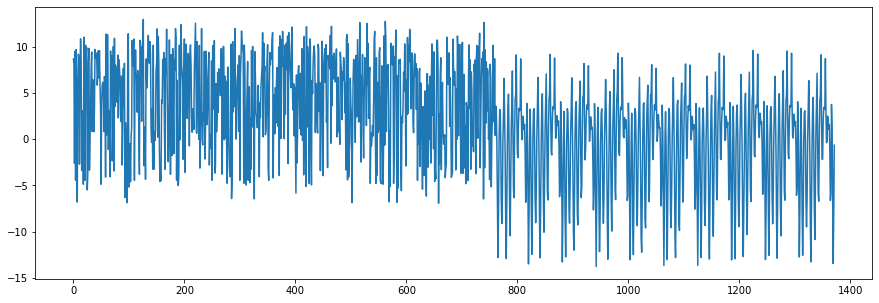

In [16]:
df['Skewness'].plot(figsize=(15,5))

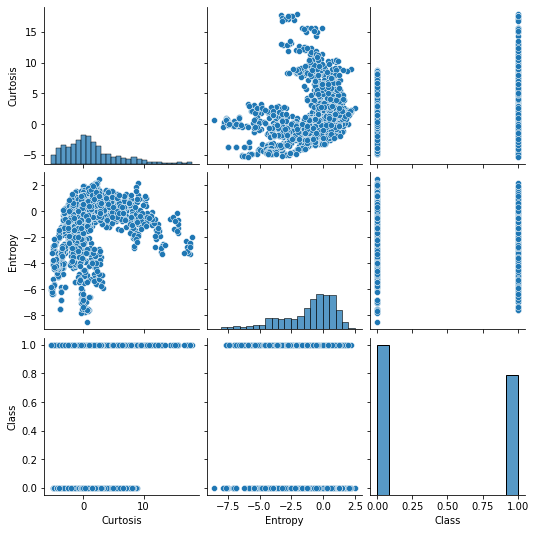

In [17]:
sns.pairplot(df.iloc[:,1:])

array([[<AxesSubplot:title={'center':'Skewness'}>,
        <AxesSubplot:title={'center':'Curtosis'}>],
       [<AxesSubplot:title={'center':'Entropy'}>,
        <AxesSubplot:title={'center':'Class'}>]], dtype=object)

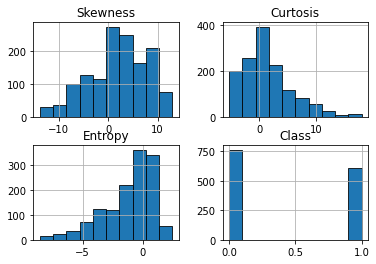

In [18]:
df.hist(edgecolor="black",linewidth=0.80)

<AxesSubplot:>

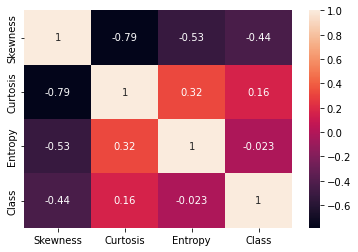

In [19]:
sns.heatmap(df.corr(),annot=True)

In [20]:
df.dtypes

Skewness    float64
Curtosis    float64
Entropy     float64
Class         int64
dtype: object

In [21]:
feature_cols=['Skewness','Curtosis','Entropy']
x=df[feature_cols]
y=df.Class

# Spliting the data into train and test set

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

building the model

In [31]:

dtc=DecisionTreeClassifier()
dtc=dtc.fit(x_train,y_train)
y_pred =dtc.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
result=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1=classification_report(y_test, y_pred)
print("Classification Report: ")
print(result1)
result2=accuracy_score(y_test, y_pred)
print("Accuracy: ")

print(result2)


Confusion Matrix:
[[222  13]
 [ 15 162]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       235
           1       0.93      0.92      0.92       177

    accuracy                           0.93       412
   macro avg       0.93      0.93      0.93       412
weighted avg       0.93      0.93      0.93       412

Accuracy: 
0.9320388349514563


# Plotting the Decision Tree

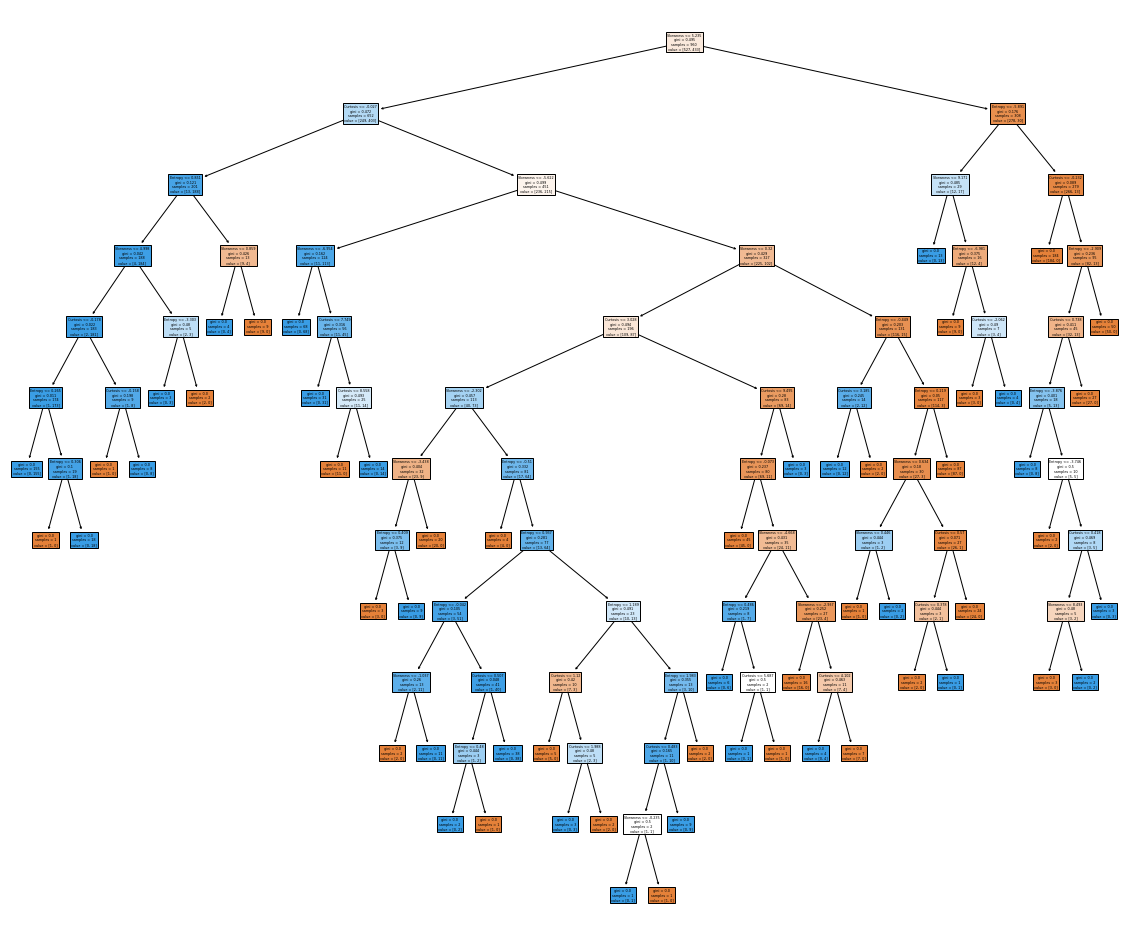

In [40]:

from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,17))
dtvis=tree.plot_tree(dtc,feature_names=x.columns, filled=True)


# Thank You!!!